## Data Cleaning

### Packages Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read in data

In [2]:
nyc_df = pd.read_csv('.\dataset_tsmc2014\dataset_TSMC2014_NYC.txt', delimiter = "\t", names=["user_id", "venue_id", "venue_category_id", "venue_category_name", "latitude", "longitude", "timezone_offset", "UTC_time"])

In [3]:
nyc_df.head()

,user_id,venue_id,venue_category_id,venue_category_name,latitude,longitude,timezone_offset,UTC_time
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012


In [4]:
nyc_df['cleaned_UTC_time'] = pd.to_datetime(nyc_df["UTC_time"])

In [5]:
nyc_df.dtypes

user_id                              int64
venue_id                            object
venue_category_id                   object
venue_category_name                 object
latitude                           float64
longitude                          float64
timezone_offset                      int64
UTC_time                            object
cleaned_UTC_time       datetime64[ns, UTC]
dtype: object

In [36]:
nyc_df

,user_id,venue_id,venue_category_id,venue_category_name,latitude,longitude,timezone_offset,UTC_time,cleaned_UTC_time
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,2012-04-03 18:00:09+00:00
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012,2012-04-03 18:00:25+00:00
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012,2012-04-03 18:02:24+00:00
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012,2012-04-03 18:02:41+00:00
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,2012-04-03 18:03:00+00:00
...,...,...,...,...,...,...,...,...,...
227423,688,3fd66200f964a52000e71ee3,4bf58dd8d48988d1e7931735,Music Venue,40.733596,-74.003139,-300,Sat Feb 16 02:29:11 +0000 2013,2013-02-16 02:29:11+00:00
227424,560,4bca32ff0687ef3be789dbcc,4bf58dd8d48988d16c941735,Burger Joint,40.745719,-73.993720,-300,Sat Feb 16 02:31:35 +0000 2013,2013-02-16 02:31:35+00:00
227425,945,50a77716e4b0b5a9492f6f56,4bf58dd8d48988d103941735,Home (private),40.854364,-73.883070,-300,Sat Feb 16 02:33:16 +0000 2013,2013-02-16 02:33:16+00:00
227426,671,4514efe0f964a520e7391fe3,4bf58dd8d48988d11d941735,Bar,40.735981,-74.029309,-300,Sat Feb 16 02:34:31 +0000 2013,2013-02-16 02:34:31+00:00


### Remove Duplicate Data

Check how many data (227428 rows) and duplicate data (241 rows) is in the dataframe

In [14]:
nyc_df

,user_id,venue_id,venue_category_id,venue_category_name,latitude,longitude,timezone_offset,UTC_time,cleaned_UTC_time
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,2012-04-03 18:00:09+00:00
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012,2012-04-03 18:00:25+00:00
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012,2012-04-03 18:02:24+00:00
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012,2012-04-03 18:02:41+00:00
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,2012-04-03 18:03:00+00:00
...,...,...,...,...,...,...,...,...,...
227423,688,3fd66200f964a52000e71ee3,4bf58dd8d48988d1e7931735,Music Venue,40.733596,-74.003139,-300,Sat Feb 16 02:29:11 +0000 2013,2013-02-16 02:29:11+00:00
227424,560,4bca32ff0687ef3be789dbcc,4bf58dd8d48988d16c941735,Burger Joint,40.745719,-73.993720,-300,Sat Feb 16 02:31:35 +0000 2013,2013-02-16 02:31:35+00:00
227425,945,50a77716e4b0b5a9492f6f56,4bf58dd8d48988d103941735,Home (private),40.854364,-73.883070,-300,Sat Feb 16 02:33:16 +0000 2013,2013-02-16 02:33:16+00:00
227426,671,4514efe0f964a520e7391fe3,4bf58dd8d48988d11d941735,Bar,40.735981,-74.029309,-300,Sat Feb 16 02:34:31 +0000 2013,2013-02-16 02:34:31+00:00


In [38]:
duplicate_df = nyc_df.duplicated(subset=['user_id', 'venue_id', 'UTC_time'], keep='first')
nyc_df[duplicate_df]

,user_id,venue_id,venue_category_id,venue_category_name,latitude,longitude,timezone_offset,UTC_time,cleaned_UTC_time
37,525,4f5684de771657f331e5ca01,4bf58dd8d48988d103941735,Home (private),40.963241,-74.094631,-240,Tue Apr 03 18:19:07 +0000 2012,2012-04-03 18:19:07+00:00
186,184,4a06f10df964a5200c731fe3,4bf58dd8d48988d146941735,Deli / Bodega,40.720989,-73.981049,-240,Tue Apr 03 20:05:56 +0000 2012,2012-04-03 20:05:56+00:00
670,74,4e63bfa345ddda352a235a77,4bf58dd8d48988d103941735,Home (private),40.772557,-74.141613,-240,Tue Apr 03 23:50:48 +0000 2012,2012-04-03 23:50:48+00:00
954,105,4afb4334f964a520791c22e3,4bf58dd8d48988d1a2941735,Community College,40.951057,-74.089866,-240,Wed Apr 04 02:11:53 +0000 2012,2012-04-04 02:11:53+00:00
1010,632,4d9e06cb7958f04dbac323fa,4bf58dd8d48988d1b2941735,College Academic Building,40.809182,-73.961730,-240,Wed Apr 04 03:00:08 +0000 2012,2012-04-04 03:00:08+00:00
1020,531,4f4daa8fe4b0b0a214b444c3,4bf58dd8d48988d103941735,Home (private),40.935081,-73.965371,-240,Wed Apr 04 03:13:25 +0000 2012,2012-04-04 03:13:25+00:00
1342,718,4e6dd06a922ebcdd8c0b1102,4bf58dd8d48988d1fe931735,Bus Station,40.818941,-73.952225,-240,Wed Apr 04 11:49:12 +0000 2012,2012-04-04 11:49:12+00:00
1865,467,4f7c7404e4b0726c394e1284,4f4533814b9074f6e4fb0107,Nursery School,40.627387,-73.962177,-240,Wed Apr 04 16:18:05 +0000 2012,2012-04-04 16:18:05+00:00
1900,797,4b2a7d44f964a52024aa24e3,4bf58dd8d48988d1d2941735,Sushi Restaurant,40.756710,-73.980519,-240,Wed Apr 04 16:37:01 +0000 2012,2012-04-04 16:37:01+00:00
2212,495,4b702987f964a52084092de3,4bf58dd8d48988d1e0931735,Coffee Shop,40.787226,-74.046446,-240,Wed Apr 04 19:07:35 +0000 2012,2012-04-04 19:07:35+00:00


Fact checking the correctness of the duplicating data, using the first record as example.

In [39]:
nyc_df[(nyc_df.user_id==525) & (nyc_df.venue_id=='4f5684de771657f331e5ca01') & (nyc_df.UTC_time=='Tue Apr 03 18:19:07 +0000 2012')]

,user_id,venue_id,venue_category_id,venue_category_name,latitude,longitude,timezone_offset,UTC_time,cleaned_UTC_time
36,525,4f5684de771657f331e5ca01,4bf58dd8d48988d103941735,Home (private),40.963241,-74.094631,-240,Tue Apr 03 18:19:07 +0000 2012,2012-04-03 18:19:07+00:00
37,525,4f5684de771657f331e5ca01,4bf58dd8d48988d103941735,Home (private),40.963241,-74.094631,-240,Tue Apr 03 18:19:07 +0000 2012,2012-04-03 18:19:07+00:00


Remove duplicating data

In [6]:
cleaned_nyc_df = nyc_df.drop_duplicates(subset=['user_id', 'venue_id', 'UTC_time'], keep='first')
cleaned_nyc_df

,user_id,venue_id,venue_category_id,venue_category_name,latitude,longitude,timezone_offset,UTC_time,cleaned_UTC_time
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,2012-04-03 18:00:09+00:00
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012,2012-04-03 18:00:25+00:00
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012,2012-04-03 18:02:24+00:00
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012,2012-04-03 18:02:41+00:00
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,2012-04-03 18:03:00+00:00
...,...,...,...,...,...,...,...,...,...
227423,688,3fd66200f964a52000e71ee3,4bf58dd8d48988d1e7931735,Music Venue,40.733596,-74.003139,-300,Sat Feb 16 02:29:11 +0000 2013,2013-02-16 02:29:11+00:00
227424,560,4bca32ff0687ef3be789dbcc,4bf58dd8d48988d16c941735,Burger Joint,40.745719,-73.993720,-300,Sat Feb 16 02:31:35 +0000 2013,2013-02-16 02:31:35+00:00
227425,945,50a77716e4b0b5a9492f6f56,4bf58dd8d48988d103941735,Home (private),40.854364,-73.883070,-300,Sat Feb 16 02:33:16 +0000 2013,2013-02-16 02:33:16+00:00
227426,671,4514efe0f964a520e7391fe3,4bf58dd8d48988d11d941735,Bar,40.735981,-74.029309,-300,Sat Feb 16 02:34:31 +0000 2013,2013-02-16 02:34:31+00:00


### Checking how many categories are in the dataframe

In [41]:
def general_frequent_visited_categories(df):
    ret_df = df.groupby(['venue_category_name']).size().reset_index(name='counts')
    ret_df = ret_df.sort_values(by=['counts'])
    return ret_df

In [42]:
frequency_df = general_frequent_visited_categories(nyc_df)
frequency_df

,venue_category_name,counts
157,Music School,1
153,Motorcycle Shop,2
176,Photography Lab,2
48,Castle,2
174,Pet Service,3
211,Sorority House,4
0,Afghan Restaurant,4
111,Gluten-free Restaurant,5
127,Internet Cafe,6
73,Distillery,8


In [43]:
pd.set_option('display.max_rows', frequency_df.shape[0]+1)
print(frequency_df)

                          venue_category_name  counts
157                              Music School       1
153                           Motorcycle Shop       2
176                           Photography Lab       2
48                                     Castle       2
174                               Pet Service       3
211                            Sorority House       4
0                           Afghan Restaurant       4
111                    Gluten-free Restaurant       5
127                             Internet Cafe       6
73                                 Distillery       8
25                   Bike Rental / Bike Share       9
183                     Portuguese Restaurant       9
178                               Planetarium      11
90                          Fish & Chips Shop      11
6                                    Aquarium      11
225                          Swiss Restaurant      12
162                                 Newsstand      12
151                       Mo

### Exploring on the distribution of the duration

1. Eateries

In [44]:
bar_df = nyc_df[nyc_df.venue_category_name == 'Bar']
bar_df

,user_id,venue_id,venue_category_id,venue_category_name,latitude,longitude,timezone_offset,UTC_time,cleaned_UTC_time
149,272,4f318c84e5e8657f88d830ac,4bf58dd8d48988d112941735,Bar,40.725730,-73.792527,-240,Tue Apr 03 19:42:24 +0000 2012,2012-04-03 19:42:24+00:00
207,445,4bae5fb6f964a520b4a93be3,4bf58dd8d48988d112941735,Bar,40.731786,-73.983701,-240,Tue Apr 03 20:21:06 +0000 2012,2012-04-03 20:21:06+00:00
208,516,4f297e04a17c6fd5208ea108,4bf58dd8d48988d116941735,Bar,40.758847,-73.989551,-240,Tue Apr 03 20:21:12 +0000 2012,2012-04-03 20:21:12+00:00
233,798,3fd66200f964a520e1f01ee3,4bf58dd8d48988d11d941735,Bar,40.827207,-73.926031,-240,Tue Apr 03 20:39:38 +0000 2012,2012-04-03 20:39:38+00:00
339,84,4a859ca3f964a520a5fe1fe3,4bf58dd8d48988d11b941735,Bar,40.752752,-73.973054,-240,Tue Apr 03 21:35:09 +0000 2012,2012-04-03 21:35:09+00:00
...,...,...,...,...,...,...,...,...,...
227405,126,4ad04456f964a520c7d720e3,4bf58dd8d48988d1d8941735,Bar,40.760871,-73.990166,-300,Sat Feb 16 02:11:14 +0000 2013,2013-02-16 02:11:14+00:00
227414,783,4bd8df990115c9b618ba7580,4bf58dd8d48988d1d8941735,Bar,40.740787,-73.993319,-300,Sat Feb 16 02:17:49 +0000 2013,2013-02-16 02:17:49+00:00
227416,751,41005500f964a5204e0b1fe3,4bf58dd8d48988d116941735,Bar,40.666674,-73.988171,-300,Sat Feb 16 02:19:07 +0000 2013,2013-02-16 02:19:07+00:00
227426,671,4514efe0f964a520e7391fe3,4bf58dd8d48988d11d941735,Bar,40.735981,-74.029309,-300,Sat Feb 16 02:34:31 +0000 2013,2013-02-16 02:34:31+00:00


In [45]:
for index, row in bar_df.iterrows():
    user_df = nyc_df[nyc_df.user_id == row.user_id]
    

In [46]:
gluten_df = cleaned_nyc_df[cleaned_nyc_df.venue_category_name == 'Gluten-free Restaurant']
gluten_df

<ipython-input-46-ed9e7e770362>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gluten_df = cleaned_nyc_df[nyc_df.venue_category_name == 'Gluten-free Restaurant']


,user_id,venue_id,venue_category_id,venue_category_name,latitude,longitude,timezone_offset,UTC_time,cleaned_UTC_time
41707,827,4c6707209cb82d7fd17792d2,4c2cd86ed066bed06c3c5209,Gluten-free Restaurant,40.779047,-73.778355,-240,Sat Apr 28 21:56:41 +0000 2012,2012-04-28 21:56:41+00:00
102678,729,4fd3a5a7e4b06a2d8d387b40,4c2cd86ed066bed06c3c5209,Gluten-free Restaurant,40.925701,-73.984058,-240,Sat Jun 09 19:36:34 +0000 2012,2012-06-09 19:36:34+00:00
174144,246,4cbde136f50e224b302b07fc,4c2cd86ed066bed06c3c5209,Gluten-free Restaurant,40.734394,-73.997078,-300,Sat Nov 10 22:00:00 +0000 2012,2012-11-10 22:00:00+00:00
180088,57,4df957aad164bbe54613d236,4c2cd86ed066bed06c3c5209,Gluten-free Restaurant,40.812210,-74.125172,-300,Wed Nov 21 00:10:20 +0000 2012,2012-11-21 00:10:20+00:00
188577,779,4df957aad164bbe54613d236,4c2cd86ed066bed06c3c5209,Gluten-free Restaurant,40.812210,-74.125172,-300,Tue Dec 04 19:37:11 +0000 2012,2012-12-04 19:37:11+00:00


In [109]:
return_df = pd.DataFrame()

for index, row in gluten_df.iterrows():
    next_records_df = cleaned_nyc_df[(cleaned_nyc_df.user_id == row.user_id) & (cleaned_nyc_df.cleaned_UTC_time > row.cleaned_UTC_time) 
                                 & (cleaned_nyc_df.venue_id != row.venue_id)]

    if next_records_df.size > 1:
        next_record = next_records_df.iloc[[0]]
        c = next_record.cleaned_UTC_time - row.cleaned_UTC_time

        if c[c.index[0]].days < 1:
            return_df = return_df.append({"duration": c[c.index[0]].seconds / 60}, ignore_index=True)
            
print(return_df)

     duration
0    1.700000
1  296.250000
2    3.733333


In [92]:
return_df

,duration
0,1.700000
1,296.250000
2,3.733333


In [107]:
def make_duration_dataframe(df, category_name):
    interest_df = cleaned_nyc_df[cleaned_nyc_df.venue_category_name == category_name]
    
    return_df = pd.DataFrame()
    for index, row in interest_df.iterrows():
        next_records_df = cleaned_nyc_df[(cleaned_nyc_df.user_id == row.user_id) & (cleaned_nyc_df.cleaned_UTC_time > row.cleaned_UTC_time) 
                                     & (cleaned_nyc_df.venue_id != row.venue_id)]
        
        if next_records_df.size > 1:
            next_record = next_records_df.iloc[[0]]
            c = next_record.cleaned_UTC_time - row.cleaned_UTC_time

            if c[c.index[0]].days < 1:
                return_df = return_df.append({"duration": c[c.index[0]].seconds / 60}, ignore_index=True)

    return return_df

In [110]:
bar_duration_df = make_duration_dataframe(cleaned_nyc_df, "Bar")
bar_duration_df

,duration
0,396.833333
1,56.416667
2,536.100000
3,401.500000
4,148.350000
...,...
11075,160.400000
11076,219.033333
11077,401.733333
11078,39.100000


To see the statistic of the bar dataframe

In [115]:
bar_duration_df.describe()

,duration
count,11080.000000
mean,441.450739
std,442.447242
min,0.016667
25%,72.962500
50%,212.175000
75%,826.595833
max,1439.633333


In [111]:
coffee_shop_duration_df = make_duration_dataframe(cleaned_nyc_df, "Coffee Shop")
coffee_shop_duration_df

,duration
0,9.716667
1,46.400000
2,54.116667
3,323.683333
4,195.850000
...,...
5400,42.100000
5401,151.366667
5402,12.566667
5403,598.566667


In [114]:
coffee_shop_duration_df.describe()

,duration
count,5405.000000
mean,304.649248
std,389.220748
min,0.083333
25%,21.616667
50%,126.600000
75%,436.616667
max,1439.566667


2. Shops & Services 

In [112]:
medical_center_duration_df = make_duration_dataframe(cleaned_nyc_df, "Medical Center")
medical_center_duration_df

,duration
0,157.783333
1,0.650000
2,1278.033333
3,592.966667
4,176.616667
...,...
2304,464.133333
2305,237.316667
2306,78.500000
2307,1129.900000


In [116]:
medical_center_duration_df.describe()

,duration
count,2309.000000
mean,319.908871
std,393.219078
min,0.050000
25%,15.250000
50%,141.366667
75%,493.316667
max,1439.783333


In [113]:
clothing_store_duration_df = make_duration_dataframe(cleaned_nyc_df, "Clothing Store")
clothing_store_duration_df

,duration
0,302.950000
1,5.000000
2,3.866667
3,8.333333
4,8.266667
...,...
2322,13.066667
2323,46.100000
2324,12.933333
2325,24.566667


In [158]:
gym_df = make_duration_dataframe(cleaned_nyc_df, "Gym / Fitness Center")
gym_df

,duration
0,379.883333
1,291.500000
2,115.283333
3,884.416667
4,228.183333
...,...
5534,201.166667
5535,413.866667
5536,752.033333
5537,788.816667


In [118]:
clothing_store_duration_df.sort_values(by='duration')

,duration
1644,0.016667
1695,0.066667
2220,0.066667
1426,0.083333
1762,0.083333
...,...
1324,1434.183333
2067,1434.466667
933,1435.883333
19,1438.966667


In [117]:
clothing_store_duration_df.describe()

,duration
count,2327.000000
mean,240.035532
std,370.838704
min,0.016667
25%,14.716667
50%,56.833333
75%,272.108333
max,1439.800000


In [129]:
college_academic_building_duration_df = make_duration_dataframe(cleaned_nyc_df, "College Academic Building")
college_academic_building_duration_df

,duration
0,8.366667
1,635.166667
2,1188.600000
3,360.716667
4,113.266667
...,...
2666,1329.550000
2667,0.383333
2668,35.033333
2669,305.050000


In [130]:
school_df = make_duration_dataframe(cleaned_nyc_df, "School")
school_df

,duration
0,17.750000
1,3.250000
2,0.150000
3,0.550000
4,57.566667
...,...
909,644.366667
910,511.133333
911,2.300000
912,34.700000


In [131]:
music_venue_df = make_duration_dataframe(cleaned_nyc_df, "Music Venue")
music_venue_df

,duration
0,622.200000
1,31.300000
2,319.816667
3,0.533333
4,40.433333
...,...
934,63.716667
935,46.316667
936,32.816667
937,43.316667


In [132]:
theater_df = make_duration_dataframe(cleaned_nyc_df, "Theater")
theater_df

,duration
0,977.283333
1,1134.283333
2,191.216667
3,900.550000
4,204.050000
...,...
688,3.150000
689,9.216667
690,3.550000
691,845.850000


### Visualization of the duration

In [152]:
def visualising_the_duration_df(visualising_df, category_name):
    plt.bar([i for i in range(visualising_df.size)], visualising_df['duration'], color = 'maroon', width = 0.4)
 
    plt.xlabel("Index")
    plt.ylabel("Duration (in mins)")
    plt.title("Durations for people in {}".format(category_name))
    plt.show()

#### Visualize the behaviour of Eateries graphs

Visualize the graph for the people's duration in bar

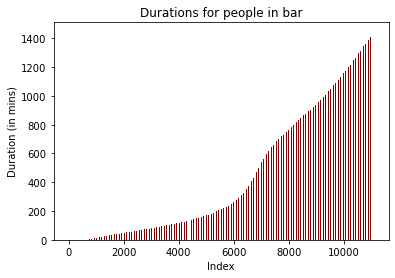

In [126]:
visualising_the_duration_df(bar_duration_df.sort_values(by='duration'), 'bar')

Visualize the graph for people's duration in coffee shop

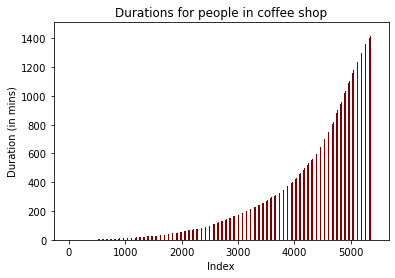

In [127]:
visualising_the_duration_df(coffee_shop_duration_df.sort_values(by='duration'), 'coffee shop')

#### Visualizing the behaviour for Shop & Services graphs

Visualize the graph for people's duration in medical center

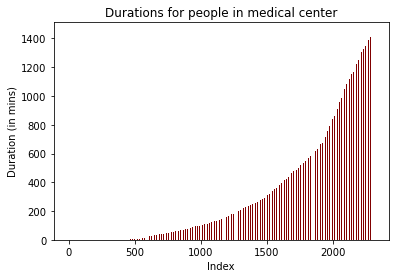

In [128]:
visualising_the_duration_df(medical_center_duration_df.sort_values(by='duration'), 'medical center')

Visualize the graph for people's duration in clothing store

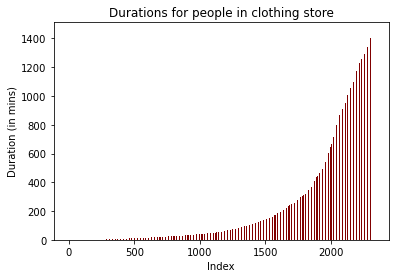

In [133]:
visualising_the_duration_df(clothing_store_duration_df.sort_values(by='duration'), 'clothing store')

#### Visualizing the behaviour for School graphs

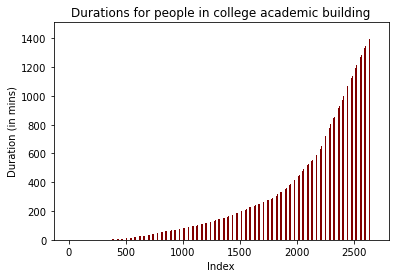

In [154]:
visualising_the_duration_df(college_academic_building_duration_df.sort_values(by='duration'), 'college academic building')

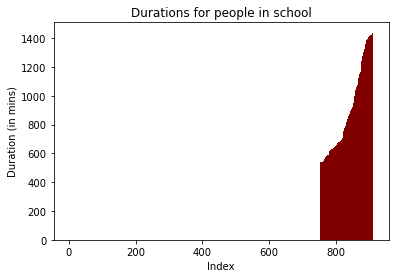

In [153]:
visualising_the_duration_df(school_df.sort_values(by='duration'), 'school')

In [156]:
sorted_school_df = school_df.sort_values(by='duration')

In [157]:
pd.set_option('display.max_rows', sorted_school_df.shape[0]+1)
print(sorted_school_df)

        duration
752     0.016667
680     0.066667
361     0.100000
563     0.116667
456     0.116667
419     0.116667
59      0.133333
33      0.133333
777     0.133333
427     0.133333
855     0.133333
28      0.133333
634     0.133333
40      0.133333
314     0.133333
845     0.133333
85      0.150000
2       0.150000
41      0.150000
45      0.150000
623     0.166667
321     0.166667
353     0.166667
432     0.166667
22      0.183333
602     0.183333
302     0.183333
587     0.183333
575     0.183333
656     0.183333
573     0.183333
259     0.183333
211     0.183333
546     0.183333
896     0.183333
330     0.200000
195     0.200000
562     0.200000
462     0.200000
844     0.200000
599     0.200000
16      0.200000
181     0.216667
815     0.216667
756     0.216667
739     0.216667
263     0.216667
633     0.216667
296     0.216667
609     0.216667
406     0.216667
595     0.216667
418     0.216667
628     0.216667
626     0.233333
448     0.233333
258     0.233333
604     0.2333

In [139]:
school_df.describe()

,duration
count,914.000000
mean,274.939460
std,350.542635
min,0.016667
25%,8.545833
50%,123.266667
75%,445.895833
max,1437.766667


#### Visualizing the behaviour for Arts graphs

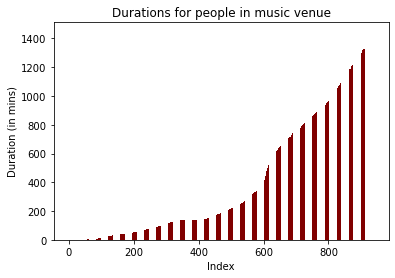

In [155]:
visualising_the_duration_df(music_venue_df.sort_values(by='duration'), 'music venue')

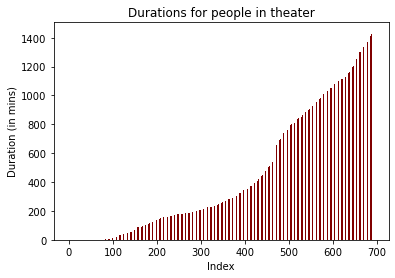

In [137]:
visualising_the_duration_df(theater_df.sort_values(by='duration'), 'theater')

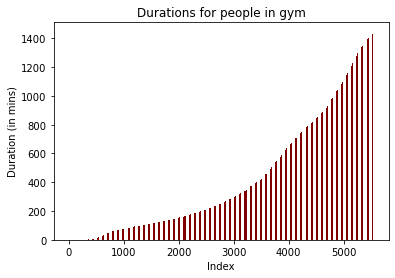

In [159]:
visualising_the_duration_df(gym_df.sort_values(by='duration'), 'gym')

### Number of user check-in per month

In [13]:
cleaned_nyc_df.head()

AttributeError: 'str' object has no attribute 'head'

In [167]:
def calculating_average_users_count_per_month(df):
    extracted_month_df = df.copy()
    extracted_month_df['month'] = extracted_month_df['cleaned_UTC_time'].dt.month
    ret_df = extracted_month_df.groupby(['month']).size().reset_index(name='counts')
    ret_df = ret_df.sort_values(by=['month'])
    return ret_df

In [169]:
average_counts_in_months_df = calculating_average_users_count_per_month(cleaned_nyc_df)
average_counts_in_months_df

,month,counts
0,1,15366
1,2,7599
2,4,43623
3,5,47111
4,6,26465
5,7,25584
6,8,10615
7,9,4753
8,10,11578
9,11,15754


### Finding all records that have next check-in within 2 hours 

In [172]:
def finding_unique_users_with_2hours_dataframe(df):
    duration_df = pd.DataFrame()
    for index, row in df.iterrows():
        next_records_df = cleaned_nyc_df[(cleaned_nyc_df.user_id == row.user_id) & (cleaned_nyc_df.cleaned_UTC_time > row.cleaned_UTC_time) 
                                     & (cleaned_nyc_df.venue_id != row.venue_id)]
        
        if next_records_df.size > 1:
            next_record = next_records_df.iloc[[0]]
            c = next_record.cleaned_UTC_time - row.cleaned_UTC_time

            if c[c.index[0]].seconds / 3600 < 2:
                duration_df = duration_df.append(row, ignore_index=True)
    return_df = duration_df.groupby(['user_id']).size().reset_index(name='counts')

    return return_df

In [173]:
unique_users_with_2hours_df = finding_unique_users_with_2hours_dataframe(cleaned_nyc_df)

In [174]:
unique_users_with_2hours_df

,user_id,counts
0,1.0,35
1,2.0,52
2,3.0,30
3,4.0,29
4,5.0,68
...,...,...
1078,1079.0,34
1079,1080.0,34
1080,1081.0,20
1081,1082.0,190


In [182]:
pd.set_option('display.max_rows', unique_users_with_2hours_df.sort_values(by=['counts']).shape[0]+1)
print(unique_users_with_2hours_df.sort_values(by=['counts']))

      user_id  counts
52       53.0       3
563     564.0       4
983     984.0       5
337     338.0       6
846     847.0       7
240     241.0       8
820     821.0       8
874     875.0       8
7         8.0       8
160     161.0       9
202     203.0       9
489     490.0      10
857     858.0      10
605     606.0      10
226     227.0      10
824     825.0      10
262     263.0      11
647     648.0      11
847     848.0      11
399     400.0      11
394     395.0      11
15       16.0      12
368     369.0      12
531     532.0      12
485     486.0      12
46       47.0      13
164     165.0      13
831     832.0      13
851     852.0      14
693     694.0      14
788     789.0      14
713     714.0      14
88       89.0      14
78       79.0      14
977     978.0      14
157     158.0      14
166     167.0      15
436     437.0      15
284     285.0      15
787     788.0      15
969     970.0      15
682     683.0      15
454     455.0      15
233     234.0      15
868     86

In [177]:
len(list(cleaned_nyc_df['user_id'].unique()))

1083

In [181]:
cleaned_nyc_df['user_id'].max()

1083

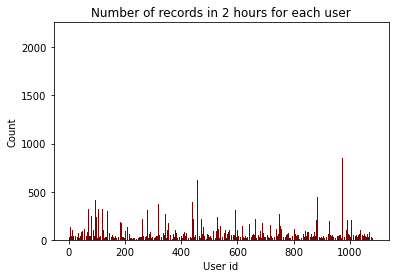

In [185]:
plt.bar(unique_users_with_2hours_df['user_id'], unique_users_with_2hours_df['counts'], color = 'maroon')
 
plt.xlabel("User id")
plt.ylabel("Count")
plt.title("Number of records in 2 hours for each user")
plt.show()

In [192]:
unique_users_with_2hours_df[unique_users_with_2hours_df.counts > 305].shape[0]

50

### Add in general categories information

In [7]:
cleaned_nyc_df.head()

,user_id,venue_id,venue_category_id,venue_category_name,latitude,longitude,timezone_offset,UTC_time,cleaned_UTC_time
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,2012-04-03 18:00:09+00:00
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012,2012-04-03 18:00:25+00:00
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012,2012-04-03 18:02:24+00:00
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012,2012-04-03 18:02:41+00:00
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,2012-04-03 18:03:00+00:00


### Performing corresponding cleaning and renaming the categories in the dataframe

In [8]:
cleaned_nyc_df.loc[cleaned_nyc_df.venue_category_name == 'Caf�', 'venue_category_name'] = 'Cafe'
cleaned_nyc_df.loc[cleaned_nyc_df.venue_category_name == 'Home (private)', 'venue_category_name'] = 'Home'

D:\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [9]:
removing_list = ['Nightlife Spot', 'Taxi', 'Other Nightlife', 'Moving Target', 'General Travel', 'Professional & Other Places', 'Harbor / Marina', 'Parking',
                 'Subway', 'Road', 'River', 'LightRail', 'City', 'Ferry', 'Bridge', 'Neighborhood']

for i in removing_list:
    cleaned_nyc_df = cleaned_nyc_df[cleaned_nyc_df.venue_category_name != i]

In [10]:
cleaned_nyc_df[cleaned_nyc_df.venue_category_name == 'Cafe']

,user_id,venue_id,venue_category_id,venue_category_name,latitude,longitude,timezone_offset,UTC_time,cleaned_UTC_time
14,931,49f85763f964a520f16c1fe3,4bf58dd8d48988d16d941735,Cafe,40.704589,-74.009639,-240,Tue Apr 03 18:09:59 +0000 2012,2012-04-03 18:09:59+00:00
480,818,3fd66200f964a52093e81ee3,4bf58dd8d48988d16d941735,Cafe,40.758117,-73.992900,-240,Tue Apr 03 22:30:59 +0000 2012,2012-04-03 22:30:59+00:00
486,994,4d27a2a1467d6ea8729fbe95,4bf58dd8d48988d16d941735,Cafe,40.716817,-73.962023,-240,Tue Apr 03 22:34:48 +0000 2012,2012-04-03 22:34:48+00:00
729,1064,4f0600499a523e111fc74653,4bf58dd8d48988d16d941735,Cafe,40.776813,-73.989342,-240,Wed Apr 04 00:10:06 +0000 2012,2012-04-04 00:10:06+00:00
934,281,4b5bac53f964a520250f29e3,4bf58dd8d48988d16d941735,Cafe,40.827871,-74.101907,-240,Wed Apr 04 01:58:25 +0000 2012,2012-04-04 01:58:25+00:00
...,...,...,...,...,...,...,...,...,...
226109,82,505dd7bee4b02c16f347d88f,4bf58dd8d48988d16d941735,Cafe,40.780408,-73.776327,-300,Tue Feb 12 18:17:06 +0000 2013,2013-02-12 18:17:06+00:00
226840,764,4adcde8af964a520196221e3,4bf58dd8d48988d16d941735,Cafe,40.748572,-73.992475,-300,Wed Feb 13 17:26:39 +0000 2013,2013-02-13 17:26:39+00:00
227015,409,4dc3df7dfa76d685cdb763c2,4bf58dd8d48988d16d941735,Cafe,40.771995,-73.982174,-300,Wed Feb 13 22:48:18 +0000 2013,2013-02-13 22:48:18+00:00
227356,346,4bab6229f964a5201ea53ae3,4bf58dd8d48988d16d941735,Cafe,40.925754,-73.839457,-300,Thu Feb 14 11:50:34 +0000 2013,2013-02-14 11:50:34+00:00


In [11]:
cleaned_nyc_df[cleaned_nyc_df.venue_category_name == 'Nightlife Spot']

,user_id,venue_id,venue_category_id,venue_category_name,latitude,longitude,timezone_offset,UTC_time,cleaned_UTC_time


In [12]:
eateries = ['Afghan Restaurant', 'Gluten-free Restaurant', 'Portuguese Restaurant', 'Fish & Chips Shop', 'Swiss Restaurant',
            'Moroccan Restaurant', 'Ethiopian Restaurant', 'Arepa Restaurant', 'Turkish Restaurant', 'Scandinavian Restaurant',
            'Argentinian Restaurant', 'Peruvian Restaurant', 'Mac & Cheese Joint', 'Filipino Restaurant', 'African Restaurant',
            'Malaysian Restaurant', 'Dumpling Restaurant', 'Cajun / Creole Restaurant', 'Dim Sum Restaurant',
            'Molecular Gastronomy Restaurant', 'Australian Restaurant', 'Eastern European Restaurant', 'Brazilian Restaurant',
            'South American Restaurant', 'Falafel Restaurant', 'Greek Restaurant', 'Wings Joint', 'Southern / Soul Food Restaurant',
            'Soup Place', 'Food', 'Mediterranean Restaurant', 'Vietnamese Restaurant', 'German Restaurant', 'Tapas Restaurant',
            'Middle Eastern Restaurant', 'Salad Place', 'Taco Place', 'Tea Room', 'Spanish Restaurant', 'Cupcake Shop',
            'Hot Dog Joint', 'Burrito Place', 'Ramen/Noodle House', 'Gastropub', 'Vegetarian / Vegan Restaurant',
            'Cuban Restaurant', 'Steakhouse', 'Indian Restaurant', 'Latin American Restaurant', 'Fried Chicken Joint',
            'Korean Restaurant', 'Caribbean Restaurant', 'Japanese Restaurant', 'Dessert Shop', 'Breakfast Spot', 'Beer Garden',
            'Thai Restaurant', 'Restaurant', 'Asian Restaurant', 'Seafood Restaurant', 'BBQ Joint', 'French Restaurant',
            'Food Truck', 'Ice Cream Shop', 'Bagel Shop', 'Sushi Restaurant', 'Donut Shop', 'Diner', 'Chinese Restaurant',
            'Cafe', 'Fast Food Restaurant', 'Burger Joint', 'Sandwich Place', 'Italian Restaurant', 'Mexican Restaurant',
            'Pizza Place', 'American Restaurant', 'Deli / Bodega', 'Food & Drink Shop', 'Coffee Shop', 'Bar']

exhibitions = ['Public Art', 'Castle', 'Historic Site', 'Planetarium', 'Aquarium', 'Science Museum', 'History Museum', 'Museum',
               'Art Museum']

religious_places = ['Mosque', 'Shrine', 'Temple', 'Synagogue', 'Church']

shops = ['Motorcycle Shop', 'Pet Service', 'Internet Cafe', 'Bike Rental / Bike Share', 'Newsstand', 'Gaming Cafe',
         'Board Shop', 'Fair', 'Antique Shop', 'Car Dealership', 'Car Wash', 'Camera Store', 'Shop & Service', 'Video Store',
         'Rental Car Location', 'Hobby Shop', 'Bridal Shop', 'Music Store',
         'Flower Shop', 'Animal Shelter', 'Spiritual Center', 'Funeral Home', 'Mobile Phone Shop', 'Nail Salon', 'Tanning Salon',
         'Record Shop', 'Market', 'Snack Place', 'Jewelry Store', 'Video Game Store', 'Tattoo Parlor', 'Gift Shop', 'Bike Shop',
         'Thrift / Vintage Store', 'Candy Store', 'Smoke Shop', 'Toy / Game Store', 'Flea Market', 'Arts & Crafts Store',
         'Paper / Office Supplies Store', 'Pet Store', 'Sporting Goods Shop', 'Hardware Store', 'Spa / Massage', 'Cosmetics Shop', 'Furniture / Home Store',
         'Automotive Shop', 'Convenience Store', 'Bookstore', 'Miscellaneous Shop', 'Mall', 'Gas Station / Garage',
         'Electronics Store', 'Salon / Barbershop', 'Plaza', 'Bakery', 'Department Store', 'Drugstore / Pharmacy', 'Clothing Store',
         'Medical Center', 'Garden Center']

services = ['Photography lab', 'Design studio', 'Cemetery', 'Library', 'Storage Facility', 'Financial or Legal Service', 'Recycling Facility',
            'Bank', 'Hotel', 'Laundry Service', 'Post Office', 'Housing Development']


education = ['Music School', 'Sorority House', 'College Theater', 'Fraternity House', 'Medical School', 'Middle School',
             'College & University', 'Trade School', 'College Stadium', 'Law School', 'Nursery School', 'Elementary School',
             'Student Center', 'Community College', 'General College & University', 'High School', 'University', 'School',
             'College Academic Building']

arts = ['Concert Hall', 'Convention Center', 'Art Gallery', 'Performing Arts Venue', 'Event Space', 'Theater', 'Music Venue']

outdoor = ['Rest Area', 'Other Great Outdoors', 'Scenic Lookout', 'Garden', 'Park', 'Beach', 'Outdoors & Recreation', 'Campground', 'Sculpture Garden']

entertainment = ['Arts & Entertainment', 'Movie Theater', 'General Entertainment', 'Stadium', 'Arcade',
                 'Bowling Alley', 'Pool', 'Comedy Club', 'Casino', 'Zoo', 'Pool Hall', 'Racetrack', 'Ski Area']

fitness = ['Athletic & Sport', 'Gym / Fitness Center']

In [17]:
general_categories_dict = {
    'Eateries': eateries,
    'Exhibitions': exhibitions,
    'Religious Places': religious_places,
    'Shops': shops,
    'Services': services,
    'Education': education,
    'Arts': arts,
    'Outdoor': outdoor,
    'Entertainment': entertainment,
    'Fitness': fitness
}

def add_general_category_information(row):
    for i in general_categories_dict:
        if row['venue_category_name'] in general_categories_dict[i]:
            return i
    return ''

cleaned_nyc_df['general_venue_category_name'] = cleaned_nyc_df.apply(add_general_category_information, axis=1)

In [18]:
cleaned_nyc_df.head()

,user_id,venue_id,venue_category_id,venue_category_name,latitude,longitude,timezone_offset,UTC_time,cleaned_UTC_time,general_venue_category_name
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,2012-04-03 18:00:09+00:00,Shops
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home,40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012,2012-04-03 18:02:24+00:00,
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012,2012-04-03 18:02:41+00:00,Shops
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,2012-04-03 18:03:00+00:00,Eateries
5,484,4b5b981bf964a520900929e3,4bf58dd8d48988d118951735,Food & Drink Shop,40.690427,-73.954687,-240,Tue Apr 03 18:04:00 +0000 2012,2012-04-03 18:04:00+00:00,Eateries


In [24]:
cleaned_nyc_df = cleaned_nyc_df[['user_id', 'venue_id', 'venue_category_id', 'venue_category_name', 'general_venue_category_name', 'latitude',
                                 'longitude', 'UTC_time']]

In [25]:
cleaned_nyc_df.head()

,user_id,venue_id,venue_category_id,venue_category_name,general_venue_category_name,latitude,longitude,UTC_time
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,Shops,40.719810,-74.002581,Tue Apr 03 18:00:09 +0000 2012
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home,,40.716162,-73.883070,Tue Apr 03 18:02:24 +0000 2012
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,Shops,40.745164,-73.982519,Tue Apr 03 18:02:41 +0000 2012
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,Eateries,40.740104,-73.989658,Tue Apr 03 18:03:00 +0000 2012
5,484,4b5b981bf964a520900929e3,4bf58dd8d48988d118951735,Food & Drink Shop,Eateries,40.690427,-73.954687,Tue Apr 03 18:04:00 +0000 2012


In [26]:
cleaned_nyc_df.to_csv('cleaned_NYC_records.csv', index=False)

## Check the most frequent visited venues

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
nyc_df = pd.read_csv('.\dataset_tsmc2014\dataset_TSMC2014_NYC.txt', delimiter = "\t", names=["user_id", "venue_id", "venue_category_id", "venue_category_name", "latitude", "longitude", "timezone_offset", "UTC_time"])
cleaned_nyc_df = nyc_df.drop_duplicates(subset=['user_id', 'venue_id', 'UTC_time'], keep='first')
ret_df = cleaned_nyc_df.groupby(['venue_id', 'venue_category_name']).size().reset_index(name='counts')
ret_df = ret_df.sort_values(by=['counts'])

In [6]:
ret_df.tail(200)

,venue_id,venue_category_name,counts
17189,4bf41b92cad2c9289e859b99,Office,86
31164,4ea37694b6347b99683dcb09,Campground,86
32529,4ef0e7cf7beb5932d5bdeb4e,Office,86
19089,4c2cdf2d8ef52d7fed9933ba,Hotel,86
24730,4d44de972e326ea872f8e8a6,Deli / Bodega,86
...,...,...,...
6859,4ace6c89f964a52078d020e3,Airport,561
2280,4840fe6bf964a52030501fe3,Bus Station,562
1529,43a52546f964a520532c1fe3,Airport,687
1305,42829c80f964a5206a221fe3,Train Station,872
